## ``grabCut`` to segment the image

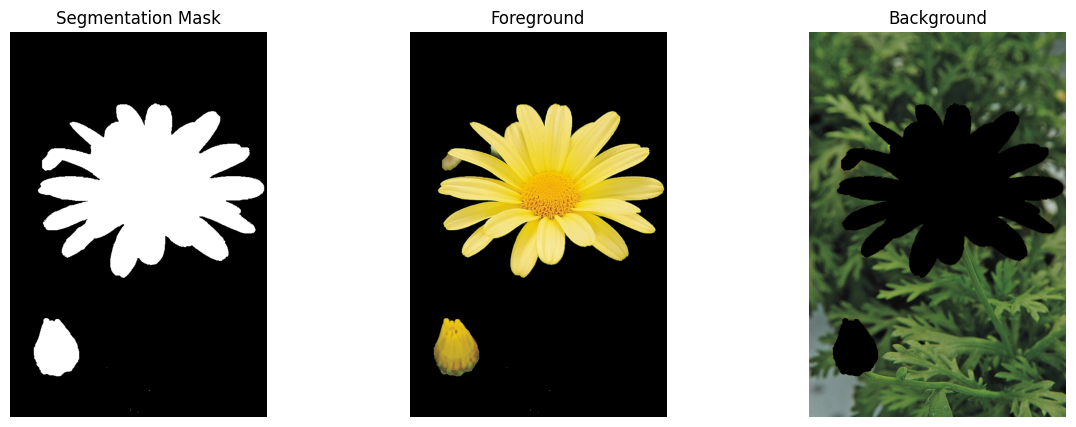

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_path = r'C:\Users\Asus\Documents\GitHub\EN3160-Image-Processing-and-Machine-Vision-Lab-Experiments\assignment_1\a1images\daisy.jpg'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Initialize the mask (all zeros)
init_mask = np.zeros(img.shape[:2], np.uint8)

# Background and foreground models (used internally by GrabCut)
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Define a bounding box around the object (flower)
bounding_box = (50, 50, img.shape[1] - 50, img.shape[0] - 50)

# Apply the GrabCut algorithm
cv2.grabCut(img, init_mask, bounding_box, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask to get the foreground
final_mask = np.where((init_mask == 2) | (init_mask == 0), 0, 1).astype('uint8')
foreground_img = img_rgb * final_mask[:, :, np.newaxis]

# Extract the background
background_img = img_rgb * (1 - final_mask[:, :, np.newaxis])

# Display segmentation results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(final_mask, cmap='gray')
plt.title('Segmentation Mask')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(foreground_img)
plt.title('Foreground')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(background_img)
plt.title('Background')
plt.axis('off')

# Adjust the space between the plots
plt.subplots_adjust(wspace=0.1)

plt.show()

## Enhace image with blur background

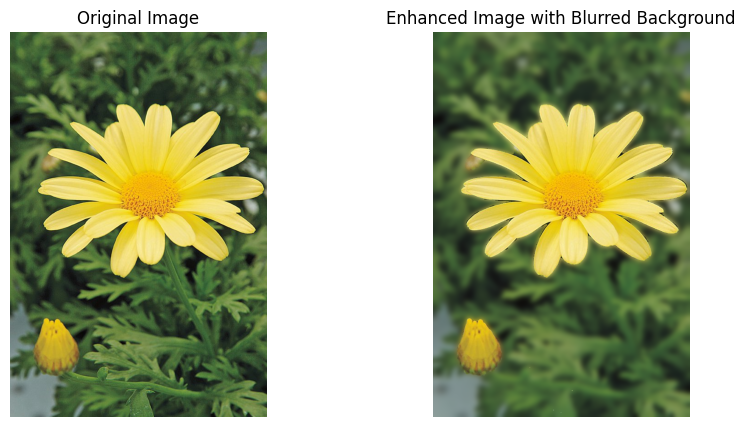

In [2]:
# Apply Gaussian blur to the background image
blurred_bg = cv2.GaussianBlur(img_rgb, (35, 35), 0)

# Combine the blurred background with the foreground image
combined_image = blurred_bg * (1 - final_mask[:, :, np.newaxis]) + foreground_img

# Display the original and combined images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(combined_image.astype('uint8'))
plt.title('Enhanced Image with Blurred Background')
plt.axis('off')

plt.show()